### **Install necessary Libraries**

In [1]:
!pip install tensorflow

In [9]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import shutil
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

### **Mount drive to get access to image dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Copy dataset from source in google drive to destination in colab environment**

In [4]:
# Path to source directory on Google Drive
source_directory = '/content/drive/MyDrive/IMAGE DATASET/raw'

# Path to destination directory in Colab
destination_directory = '/content_dataset/'

# Copy dataset folders
shutil.copytree(source_directory, destination_directory)


'/content_dataset/'

### **List out items in the dataset**

In [5]:
# Get a list of items (files and subdirectories) in the directory
items = os.listdir('/content_dataset/')

# Print the list of items
for item in items:
    print(item)

jaguar
zebra
elephant
buffalo
rhino
fox
cheetah
panda
leopard
lion


### **Combine all subfolders/classes into one dataset in an organized manner**

In [6]:
import os
import shutil

# Specify source directory (containing subfolders)
source_directory = '/content_dataset/'

# Specify destination directory for the combined dataset
combined_dataset_directory = '/content/combined_dataset/'

# Create the destination directory if it doesn't exist
os.makedirs(combined_dataset_directory, exist_ok=True)

# Iterate through subfolders and copy images to the combined dataset directory
for subfolder in os.listdir(source_directory):
    subfolder_path = os.path.join(source_directory, subfolder)
    if os.path.isdir(subfolder_path):
        for file_name in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file_name)
            if os.path.isfile(file_path):
                # Create a subdirectory in the combined dataset for the class
                class_directory = os.path.join(combined_dataset_directory, subfolder)
                os.makedirs(class_directory, exist_ok=True)

                # Copy the image to the class subdirectory
                destination_path = os.path.join(class_directory, file_name)
                shutil.copyfile(file_path, destination_path)

print("Dataset combined successfully.")

Dataset combined successfully.


In [7]:
# List the contents of the combined_dataset_directory
combined_contents = os.listdir(combined_dataset_directory)
print("Contents of combined dataset directory:")
print(combined_contents)

# List the contents of the class subdirectories
for subfolder in combined_contents:
    subfolder_path = os.path.join(combined_dataset_directory, subfolder)
    if os.path.isdir(subfolder_path):
        subfolder_contents = os.listdir(subfolder_path)
        print(f"Contents of class subdirectory '{subfolder}':")
        print(subfolder_contents)


Contents of combined dataset directory:
['jaguar', 'zebra', 'elephant', 'buffalo', 'rhino', 'fox', 'cheetah', 'panda', 'leopard', 'lion']
Contents of class subdirectory 'jaguar':
['00faed7a340a1101.jpg', 'd879bc987a5647b0.txt', 'd7a37993c69a9c06.txt', 'ab00771218f8d0b4.jpg', '28cd82b6ffaf4f82.txt', '05101fc57a1cddb9.jpg', '25c9037366f5d1fa.jpg', 'd555c6e7b78f0129.txt', '311ac95022868cce.txt', '2842be8d4362a102.jpg', '621554a236114e55.jpg', '025d25975e4275a2.txt', '00d9eb862ba3dfc6.jpg', '2d26feceab162643.txt', '298e72b6fc9e7cd8.txt', '12271a9ed07dc28e.txt', '292b2e92713b2b0e.jpg', '0107395b9550040b.jpg', '05369add5239d3db.txt', '4b13bd8892c5e377.jpg', '5bb7d055e317cffd.txt', '3cdad21202142dde.jpg', '0ff0dc652d533877.jpg', 'bb5cf06e0c97f373.jpg', '6752ad0ae33685f9.txt', '621554a236114e55.txt', '0107395b9550040b.txt', '12271a9ed07dc28e.jpg', 'd555c6e7b78f0129.jpg', 'db21d2f3774862b0.txt', 'ca2e9812a717b9b4.txt', 'c01556a0d0cd6f30.jpg', '00faed7a340a1101.txt', '5bb7d055e317cffd.jpg', 'bb5

### **Class distribution**

Number of classes: 10
Total number of images: 2306


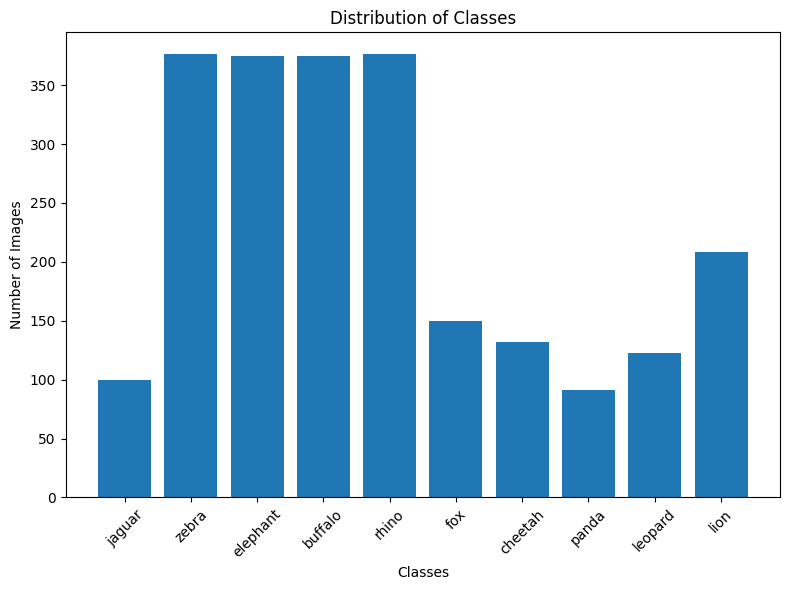

In [10]:
# Specify the directory path containing the combined dataset
combined_dataset_directory = '/content/combined_dataset/'

# Get a list of subdirectories (classes) in the combined dataset directory
classes = [d for d in os.listdir(combined_dataset_directory) if os.path.isdir(os.path.join(combined_dataset_directory, d))]

# Initialize dictionaries to store class counts
class_counts = {cls: 0 for cls in classes}

# Count the number of images per class
for cls in classes:
    class_dir = os.path.join(combined_dataset_directory, cls)
    class_counts[cls] = len([f for f in os.listdir(class_dir) if f.endswith('.jpg')])

# Display statistics
print("Number of classes:", len(classes))
print("Total number of images:", sum(class_counts.values()))

# Plot distribution of classes
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Classes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Split the combined dataset into Training, Validation, and Test sets**

In [11]:
# Specify the directory containing combined dataset
combined_dataset_directory = '/content/combined_dataset/'

# Specify the directories for training, validation, and test sets
train_directory = '/content/train_set/'
valid_directory = '/content/validation_set/'
test_directory = '/content/test_set/'

# List all class subdirectories in the combined dataset directory
class_subdirectories = [subfolder for subfolder in os.listdir(combined_dataset_directory)
                        if os.path.isdir(os.path.join(combined_dataset_directory, subfolder))]

# Loop through each class subdirectory
for class_subdirectory in class_subdirectories:
    class_directory = os.path.join(combined_dataset_directory, class_subdirectory)
    image_files = [f for f in os.listdir(class_directory) if f.endswith('.jpg')]

    # Create subdirectories in training, validation, and test sets
    train_class_directory = os.path.join(train_directory, class_subdirectory)
    valid_class_directory = os.path.join(valid_directory, class_subdirectory)
    test_class_directory = os.path.join(test_directory, class_subdirectory)
    os.makedirs(train_class_directory, exist_ok=True)
    os.makedirs(valid_class_directory, exist_ok=True)
    os.makedirs(test_class_directory, exist_ok=True)

    # Split images into training, validation, and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
    valid_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)

    # Move files to respective directories
    for file in train_files:
        src_path = os.path.join(class_directory, file)
        dst_path = os.path.join(train_class_directory, file)
        shutil.copyfile(src_path, dst_path)

    for file in valid_files:
        src_path = os.path.join(class_directory, file)
        dst_path = os.path.join(valid_class_directory, file)
        shutil.copyfile(src_path, dst_path)

    for file in test_files:
        src_path = os.path.join(class_directory, file)
        dst_path = os.path.join(test_class_directory, file)
        shutil.copyfile(src_path, dst_path)

print("Combined dataset split into training, validation, and test sets.")


Combined dataset split into training, validation, and test sets.




```

# **Modeling**


The code snippet below is used to clone the "darknet" repository from GitHub, navigate into the cloned directory, and then compile the "darknet" framework using the provided Makefile. This is typically done when you want to set up and use the "darknet" framework for tasks like object detection using neural networks.

In [12]:
# clone darknet repository and build
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15549, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 15549 (delta 10), reused 27 (delta 6), pack-reused 15514
Receiving objects: 100% (15549/15549), 14.24 MiB | 9.18 MiB/s, done.
Resolving deltas: 100% (10422/10422), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index



# **Training a YOLO Model:**

*   Clone Darknet, a popular framework for YOLO.
*   Create a file containing the names of your classes.
*   Create a backup file that saves the model's weights and progress during training.
*   Create a data file that specifies paths for training, validation, and test data.
*   Prepare configuration files for your YOLO model.
*   Modify the Darknet configuration file to match your dataset and training preferences.
*   Train the YOLO model using the configured Darknet framework.
*   Monitor the training process and adjust parameters as needed.


### **Class file**

In [13]:
class_names = [
    "cheetah",
    "buffalo",
    "panda",
    "elephant",
    "zebra",
    "leopard",
    "jaguar",
    "lion",
    "rhino",
    "fox"
]

# Write the class names to the obj.names file
with open('/content/obj.names', 'w') as names_file:
    for class_name in class_names:
        names_file.write(class_name + '\n')

print("obj.names file created successfully.")


obj.names file created successfully.


### **Backup file**

In [14]:
# Specify the backup directory path
backup_directory = '/content/backup/'

# Create the backup directory if it doesn't exist
os.makedirs(backup_directory, exist_ok=True)

print("Backup directory created successfully.")

Backup directory created successfully.


### **Data file**

In [15]:
data_content = """
classes = 10  # Number of classes
train = /content/train_set/train.txt  # Path to the text file containing paths to training images
valid = /content/validation_set/valid.txt  # Path to the text file containing paths to validation images
names = /content/obj.names  # Path to the text file containing class names
backup = /content/backup/  # Directory to save trained weights
"""

# Write the content to a .data file
with open('/content/data_content.file', 'w') as data_file:
    data_file.write(data_content)

print(".data file created successfully.")


.data file created successfully.


### **Configuration Files- yolov3.cfg**

In [16]:
config_content = """
[net]
batch=32
subdivisions=8
width=416
height=416
channels=3
momentum=0.9
decay=0.0005

[convolutional]
size=1
stride=1
pad=1
filters=80
activation=leaky

[yolo]
mask = 0,1,2
anchors = 10,13, 16,30, 33,23, 30,61, 62,45, 59,119, 116,90, 156,198, 373,326
classes=10
num=9
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
"""

print(config_content)



[net]
batch=32
subdivisions=8
width=416
height=416
channels=3
momentum=0.9
decay=0.0005

[convolutional]
size=1
stride=1
pad=1
filters=80
activation=leaky

[yolo]
mask = 0,1,2
anchors = 10,13, 16,30, 33,23, 30,61, 62,45, 59,119, 116,90, 156,198, 373,326
classes=10
num=9
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1



### **Train YOLO**


This algorithm combines the paths to data, configuration and backup files.

In [17]:
!./darknet detector train '/content/data_content.file' '/content/drive/MyDrive/yolov3.cfg' '/content/backup'

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
yolov3
max_batches: Using default '0'
learning_rate: Using default '0.001000'
policy: Using default 'constant'
mini_batch = 4, batch = 32, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     80       1 x 1/ 1    416 x 416 x   3 ->  416 x 416 x  80 0.083 BF
   1 yolo
Error: l.outputs == params.inputs 
filters= in the [convolutional]-layer doesn't correspond to classes= or mask= in [yolo]-layer 
